### Regime Identification in Multivariate Time-series

In [7]:
import regimes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)

In [8]:
# Normalization (Standard)
def normalize(data, type='minmax'):

    if type=='std':
        return (np.array(data) - np.mean(data))/np.std(data)
        
    elif type=='minmax':
        return (np.array(data) - np.min(data))/(np.max(data) - np.min(data))

In [9]:
data1=pd.read_csv(r'../datasets/Subsets/FLX_DE-Hai_FLUXNET2015_SUBSET_DD_2000-2012_1-4.csv')
TS=data1["TIMESTAMP"]
#TE=data1["TIMESTAMP_END"]
data = data1[["TA_F","NEE_VUT_REF","GPP_DT_VUT_REF"]]   #"TIMESTAMP_START","TIMESTAMP_END"

In [10]:
data=data.apply(normalize)

In [11]:
data.isnull().sum()

TA_F              0
NEE_VUT_REF       0
GPP_DT_VUT_REF    0
dtype: int64

In [12]:
data.isna().sum().sum()

0

In [13]:
data = data.apply(normalize)
data

,TA_F,NEE_VUT_REF,GPP_DT_VUT_REF
0,0.382840,0.785715,0.000000
1,0.389205,0.788490,0.000000
2,0.409998,0.789823,0.000000
3,0.434076,0.786074,0.000000
4,0.429138,0.779226,0.000000
...,...,...,...
4744,0.486647,0.805536,0.006360
4745,0.396929,0.790367,0.013979
4746,0.490951,0.806355,0.003785
4747,0.487893,0.798951,0.003000


In [14]:
data.isnull().sum()

TA_F              0
NEE_VUT_REF       0
GPP_DT_VUT_REF    0
dtype: int64

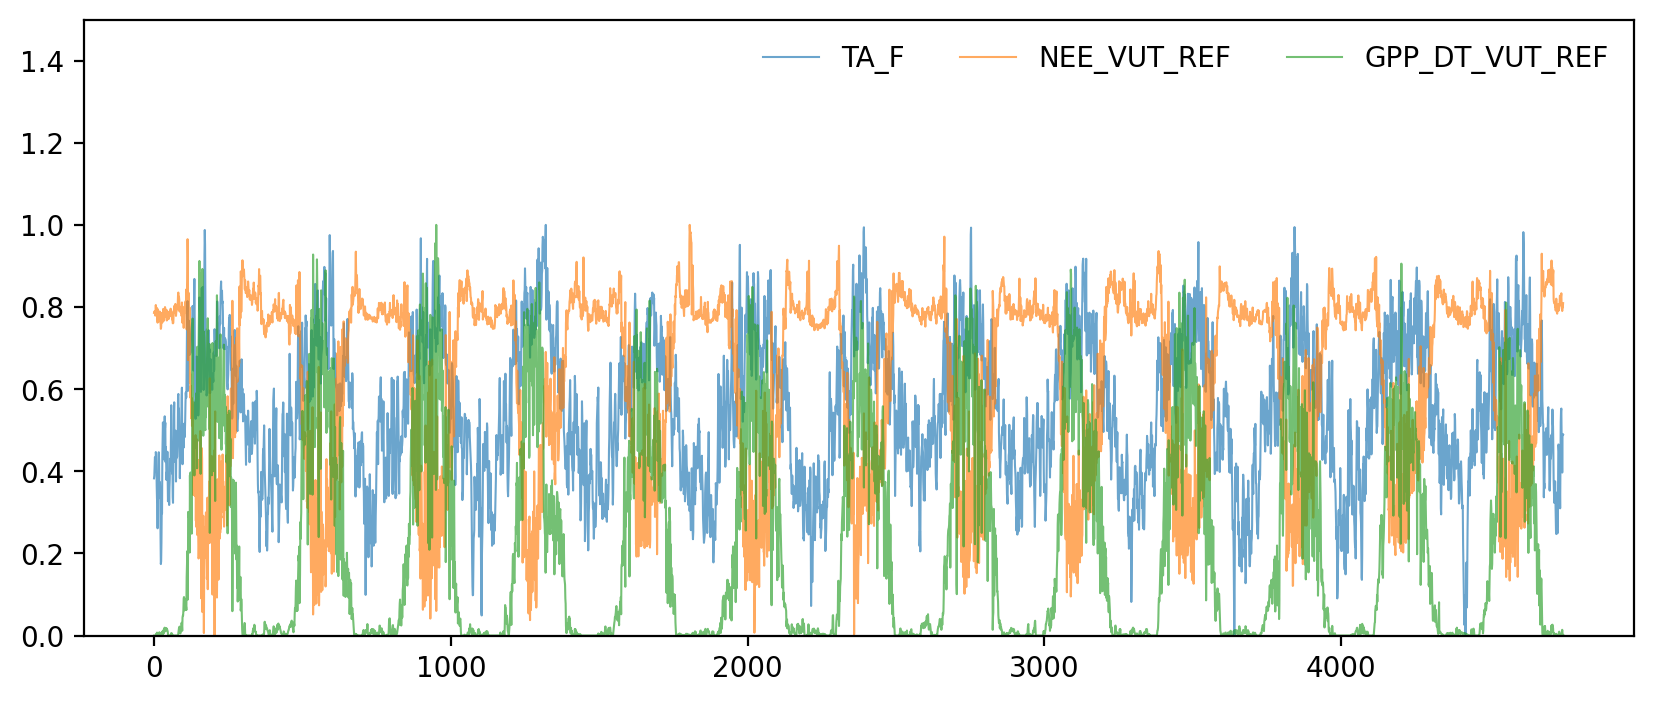

In [15]:
toplot = [i for i in data]

for i in toplot:
    data[i].plot(use_index=True, figsize=(10, 4), linewidth=0.75, alpha=0.66)
    plt.legend(toplot, frameon=False, ncol=3)
    
plt.ylim(0, 1.5)
plt.show()

In [16]:
k = 3
winsize = 80
metricE = 'Euclidean'
metricR = 'Riemannian'
clusters, cluster_idx = regimes.get_regimes(data, winsize, k, metricR)

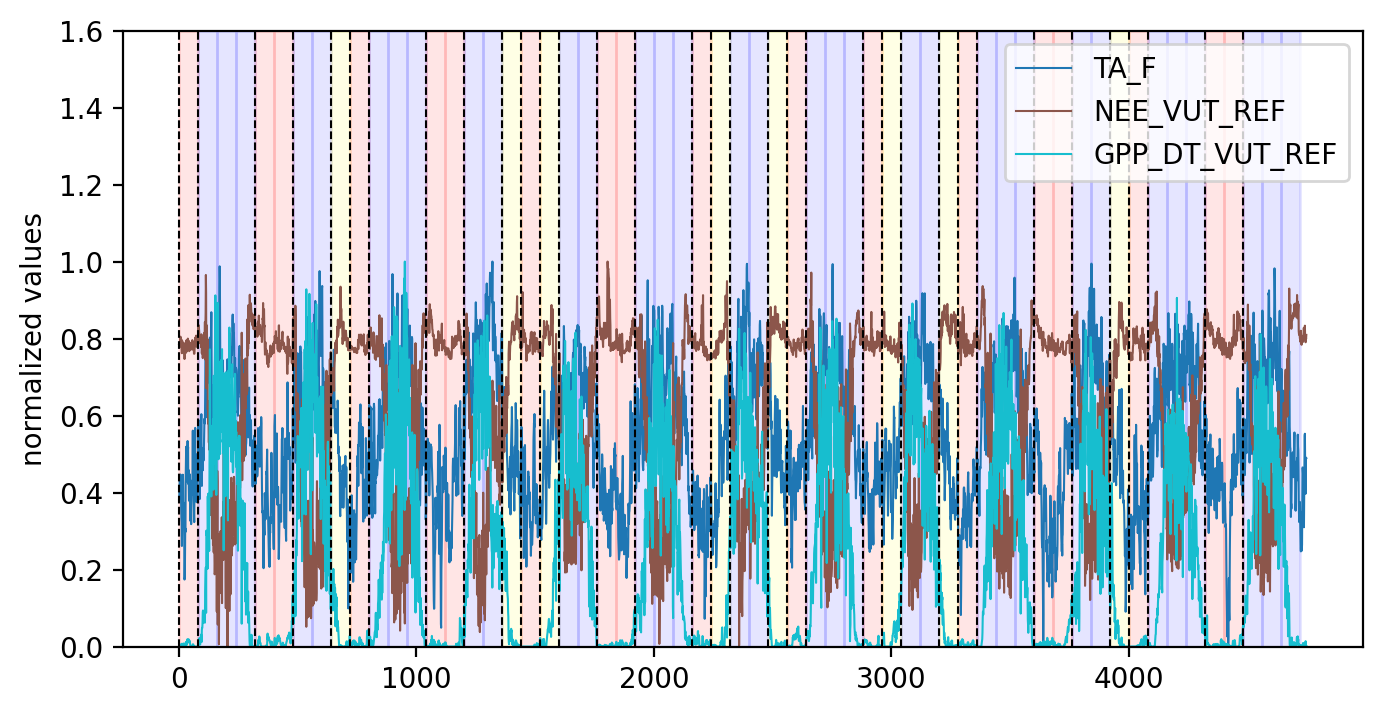

In [17]:
regimes.plot_regimes(data, clusters, cluster_idx, winsize, dtype='real')


In [12]:
clusters_extended = []

for i in range(len(clusters)):

    val = clusters[i]
    for j in range(winsize):
        clusters_extended.append(val)
        
print(len(clusters_extended), data.shape)

4720 (4749, 6)


In [13]:
datanew = data.iloc[:len(clusters_extended), :].copy()
#datanew
datanew['Clusters'] = clusters_extended
#datanew.insert(loc=0,column="TIMESTAMP_END",value=TE)
datanew.insert(loc=0,column="TIMESTAMP",value=TS) #_START",value=TS)
datanew

,TIMESTAMP,TA_F,NEE_VUT_REF,RECO_NT_VUT_REF,GPP_NT_VUT_REF,RECO_DT_VUT_REF,GPP_DT_VUT_REF,Clusters
0,20000101,0.382840,0.785715,0.116222,0.102008,0.046246,0.000000,0
1,20000102,0.389205,0.788490,0.118804,0.100631,0.046568,0.000000,0
2,20000103,0.409998,0.789823,0.127744,0.103129,0.047578,0.000000,0
3,20000104,0.434076,0.786074,0.138333,0.110763,0.048722,0.000000,0
4,20000105,0.429138,0.779226,0.135502,0.115613,0.048821,0.000000,0
...,...,...,...,...,...,...,...,...
4715,20121128,0.460826,0.889250,0.351896,0.107823,0.137117,0.007609,1
4716,20121129,0.382681,0.819335,0.298279,0.147189,0.083345,0.002195,1
4717,20121130,0.348706,0.812487,0.258585,0.136916,0.072869,0.001306,1
4718,20121201,0.323337,0.810497,0.225212,0.124970,0.080613,0.005540,1


In [14]:
#datanew.to_csv('ClusteredFLX_DE-Hai_FLUXNET2015_SUBSET_DD_2000-2012_1-4.csv')

In [15]:
#data2019
datanew["TIMESTAMP"][0]+ 101

20000202

In [16]:
#generates the data for each year from 2000 to 2012

def yearly_DA(data,year):
    datayear=(data['TIMESTAMP']>= (year*10**4+101)) & (data['TIMESTAMP']<= (year*10**4 + 1231))
    return data[datayear]

In [17]:
yearly_DA(datanew,2006)#["TIMESTAMP"]-20060000

,TIMESTAMP,TA_F,NEE_VUT_REF,RECO_NT_VUT_REF,GPP_NT_VUT_REF,RECO_DT_VUT_REF,GPP_DT_VUT_REF,Clusters
2192,20060101,0.411108,0.784097,0.158483,0.120765,0.090522,0.000000,0
2193,20060102,0.391085,0.782202,0.152094,0.119807,0.088704,0.000000,0
2194,20060103,0.343337,0.794763,0.141276,0.104344,0.084264,0.000000,0
2195,20060104,0.311898,0.797240,0.145287,0.103815,0.081240,0.000000,0
2196,20060105,0.317765,0.793583,0.162455,0.114069,0.081809,0.000000,0
...,...,...,...,...,...,...,...,...
2552,20061227,0.351741,0.794042,0.184400,0.122670,0.110781,0.015434,1
2553,20061228,0.315273,0.789602,0.149589,0.112285,0.078096,0.001061,1
2554,20061229,0.373531,0.808628,0.145299,0.093826,0.067251,0.001446,1
2555,20061230,0.418016,0.804763,0.130577,0.091179,0.058632,0.000461,1
